In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [2]:
# Define the model
def model(Y, τ, M, m, g, k, l, L, T):
    x, dx_dτ, θ, dθ_dτ = Y

    # Equations of motion
    dx_dτ = dx_dτ
    # d2x_dτ2 = (1 / (M + m) * L) * (- m * l * np.cos(θ) * d2θ_dτ2 + m * l * np.sin(θ) * dθ_dτ**2 - k * L * T**2 * x)
    d2x_dτ2 = (1 / (L * ((M + m) - m * np.cos(θ)**2))) * (m * g * T**2 * np.cos(θ) * np.sin(θ) + m * l * np.sin(θ) * dθ_dτ**2 - k * L * T**2 * x)
    dθ_dτ = dθ_dτ
    d2θ_dτ2 = (1 / l) * (- L * np.cos(θ) * d2x_dτ2 - g * T**2 * np.sin(θ))

    return [dx_dτ, d2x_dτ2, dθ_dτ, d2θ_dτ2]

def solve_and_extract(model, Y0, τ, constants):
    Y = odeint(model, Y0, τ, args=constants)
    x = Y[:, 0]
    dx_dτ = Y[:, 1]
    θ = Y[:, 2]
    θ = np.mod(θ - np.pi, 2 * np.pi) - np.pi  # make θ between -π and π only
    dθ_dτ = Y[:, 3]
    return x, dx_dτ, θ, dθ_dτ

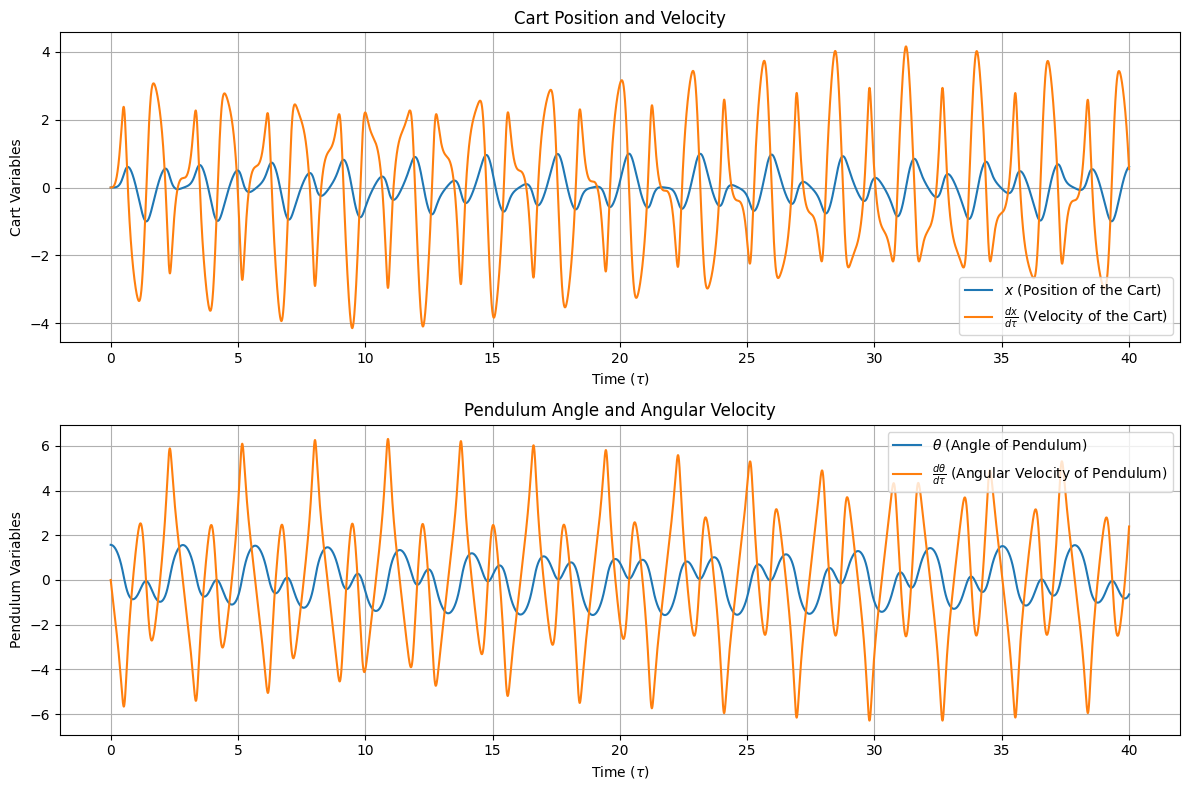

In [3]:
# Constants
M = 0.5  # Mass of the cart
m = 0.5  # Mass of the pendulum
g = 10  # Gravity
k = 10  # Spring constant
l = 1  # Length of the pendulum
L = 1  # Unit length
T = 1  # Unit time

# Initial conditions
x0 = 0
dx_dτ0 = 0
θ0 = np.pi / 2
dθ_dτ0 = 0
Y0 = [x0, dx_dτ0, θ0, dθ_dτ0]

# Solve the Differential Equations
τ_max = 40
num_point = 10_000
τ = np.linspace(0, τ_max, num_point)
x, dx_dτ, θ, dθ_dτ = solve_and_extract(model, Y0, τ, (M, m, g, k, l, L, T))

# Plot the results
plt.figure(figsize=(12, 8))

# Plot x and dx_dτ over time
plt.subplot(2, 1, 1)
plt.plot(τ, x, label=r"$x$ (Position of the Cart)")
plt.plot(τ, dx_dτ, label=r"$\frac{dx}{d\tau}$ (Velocity of the Cart)")
plt.xlabel(r"Time ($\tau$)")
plt.ylabel("Cart Variables")
plt.legend()
plt.title("Cart Position and Velocity")
plt.grid()

# Plot θ and dθ_dτ over time
plt.subplot(2, 1, 2)
plt.plot(τ, θ, label=r"$\theta$ (Angle of Pendulum)")
plt.plot(τ, dθ_dτ, label=r"$\frac{d\theta}{d\tau}$ (Angular Velocity of Pendulum)")
plt.xlabel(r"Time ($\tau$)")
plt.ylabel("Pendulum Variables")
plt.legend()
plt.title("Pendulum Angle and Angular Velocity")
plt.grid()

plt.tight_layout()
plt.show()

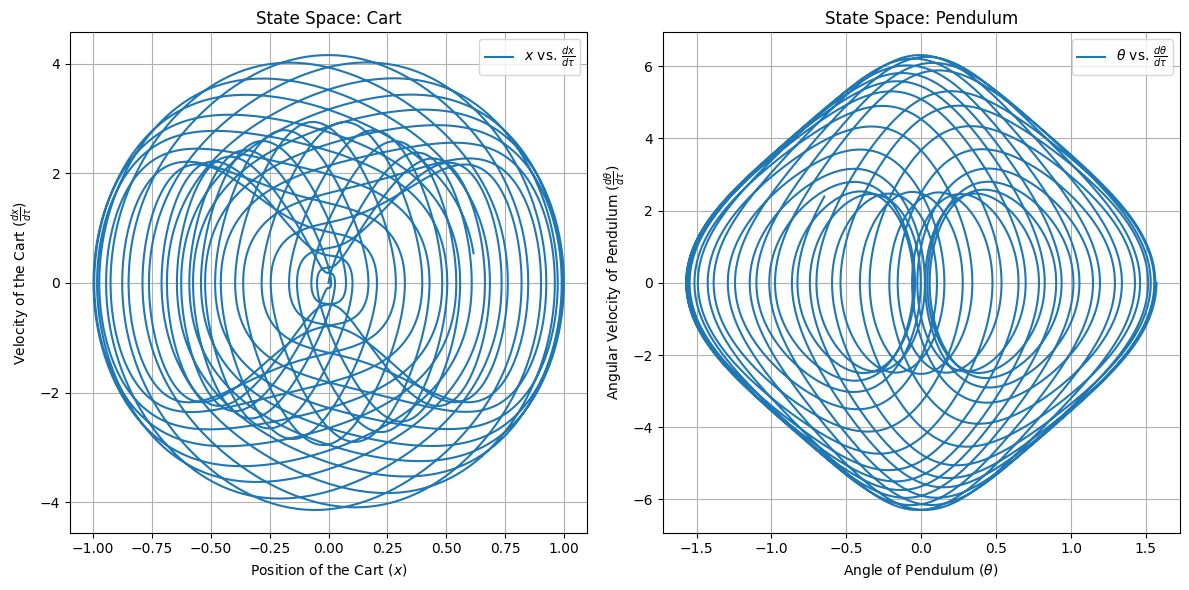

In [4]:
# Plot the phase space
plt.figure(figsize=(12, 6))

# Phase space of x vs. dx/dτ
plt.subplot(1, 2, 1)
plt.plot(x, dx_dτ, label=r"$x$ vs. $\frac{dx}{d\tau}$")
plt.xlabel(r"Position of the Cart ($x$)")
plt.ylabel(r"Velocity of the Cart ($\frac{dx}{d\tau}$)")
plt.title("State Space: Cart")
plt.grid()
plt.legend()

# Phase space of θ vs. dθ/dτ
plt.subplot(1, 2, 2)
plt.plot(θ, dθ_dτ, label=r"$\theta$ vs. $\frac{d\theta}{d\tau}$")
plt.xlabel(r"Angle of Pendulum ($\theta$)")
plt.ylabel(r"Angular Velocity of Pendulum ($\frac{d\theta}{d\tau}$)")
plt.title("State Space: Pendulum")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

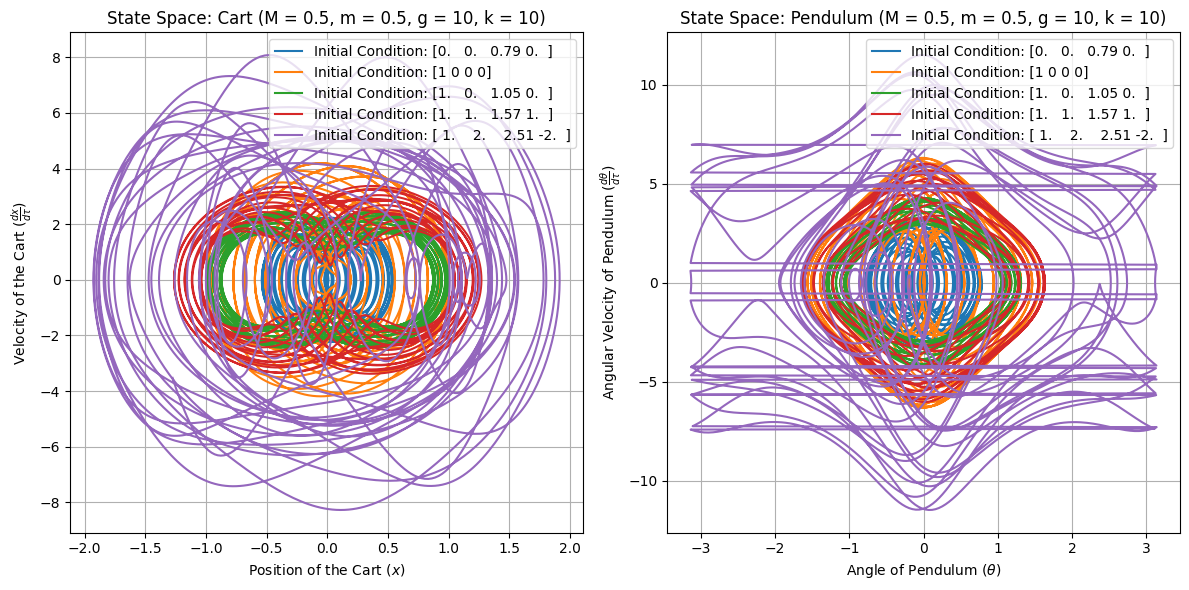

In [5]:
initial_conditions = [
    [0, 0, np.pi / 4, 0],
    [1, 0, 0, 0],
    [1, 0, np.pi / 3, 0],
    [1, 1, np.pi / 2, 1],
    [1, 2, np.pi * 0.8, -2],
]

solutions = []
for i, Y0 in enumerate(initial_conditions):
    x, dx_dτ, θ, dθ_dτ = solve_and_extract(model, Y0, τ, (M, m, g, k, l, L, T))
    solutions.append((x, dx_dτ, θ, dθ_dτ))

# Plot the results
plt.figure(figsize=(12, 6))

for cond, solution in zip(initial_conditions, solutions):
    x, dx_dτ, θ, dθ_dτ = solution
    
    # Phase space of x vs. dx/dτ
    plt.subplot(1, 2, 1)
    plt.plot(x, dx_dτ, label=f"Initial Condition: {np.round(cond, 2)}")
    plt.xlabel(r"Position of the Cart ($x$)")
    plt.ylabel(r"Velocity of the Cart ($\frac{dx}{d\tau}$)")

    # Phase space of θ vs. dθ/dτ
    plt.subplot(1, 2, 2)
    plt.plot(θ, dθ_dτ, label=f"Initial Condition: {np.round(cond, 2)}")
    plt.xlabel(r"Angle of Pendulum ($\theta$)")
    plt.ylabel(r"Angular Velocity of Pendulum ($\frac{d\theta}{d\tau}$)")
    


plt.subplot(1, 2, 1) 
plt.title(f"State Space: Cart (M = {M}, m = {m}, g = {g}, k = {k})")
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
plt.title(f"State Space: Pendulum (M = {M}, m = {m}, g = {g}, k = {k})")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(f"./figures/r-{(M / m):.0f}-k-{k}-g-{g}.pdf", format="pdf")
plt.show()

## Notes

* Found that we can make either the cart or the pendulum chaotic by changing the ratio of their natural frequencies
* If we make the angular frequency comparable in size we can introduce chaos if we add enough energy
* Small energy is the small oscillation limit, so there is less chaos

## Natural angular velocity of cart ($\sqrt{\frac{k}{M + m}}$) >> pendulum ($\sqrt{\frac{g}{l}}$) $\rarr$ bounded cart + non-stable pendulum

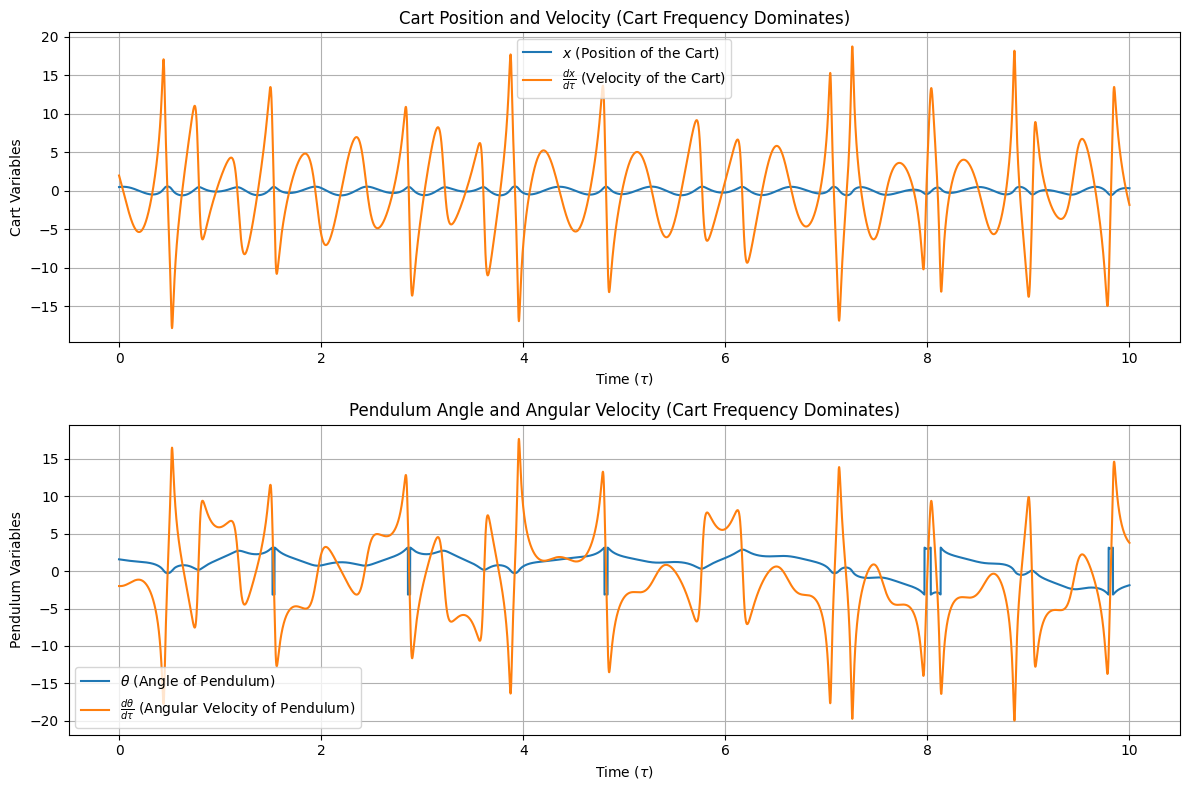

In [6]:
# Modify constants to make the cart frequency dominate
M = 0.09  # Mass of the cart
m = 0.91  # Mass of the pendulum
g = 1  # Gravity
k = 100  # Spring constant
l = 1  # Length of the pendulum
L = 1  # Unit length
T = 1  # Unit time

# Initial conditions
x0 = 0.5
dx_dτ0 = 2
θ0 = np.pi / 2
dθ_dτ0 = -2
Y0 = [x0, dx_dτ0, θ0, dθ_dτ0]

# Solve the Differential Equations
τ_max = 10
num_point = 10_000
τ = np.linspace(0, τ_max, num_point)
x, dx_dτ, θ, dθ_dτ = solve_and_extract(model, Y0, τ, (M, m, g, k, l, L, T))

# Plot the results
plt.figure(figsize=(12, 8))

# Plot x and dx_dτ over time
plt.subplot(2, 1, 1)
plt.plot(τ, x, label=r"$x$ (Position of the Cart)")
plt.plot(τ, dx_dτ, label=r"$\frac{dx}{d\tau}$ (Velocity of the Cart)")
plt.xlabel(r"Time ($\tau$)")
plt.ylabel("Cart Variables")
plt.legend()
plt.title("Cart Position and Velocity (Cart Frequency Dominates)")
plt.grid()

# Plot θ and dθ_dτ over time
plt.subplot(2, 1, 2)
plt.plot(τ, θ, label=r"$\theta$ (Angle of Pendulum)")
plt.plot(τ, dθ_dτ, label=r"$\frac{d\theta}{d\tau}$ (Angular Velocity of Pendulum)")
plt.xlabel(r"Time ($\tau$)")
plt.ylabel("Pendulum Variables")
plt.legend()
plt.title("Pendulum Angle and Angular Velocity (Cart Frequency Dominates)")
plt.grid()

plt.tight_layout()
plt.show()

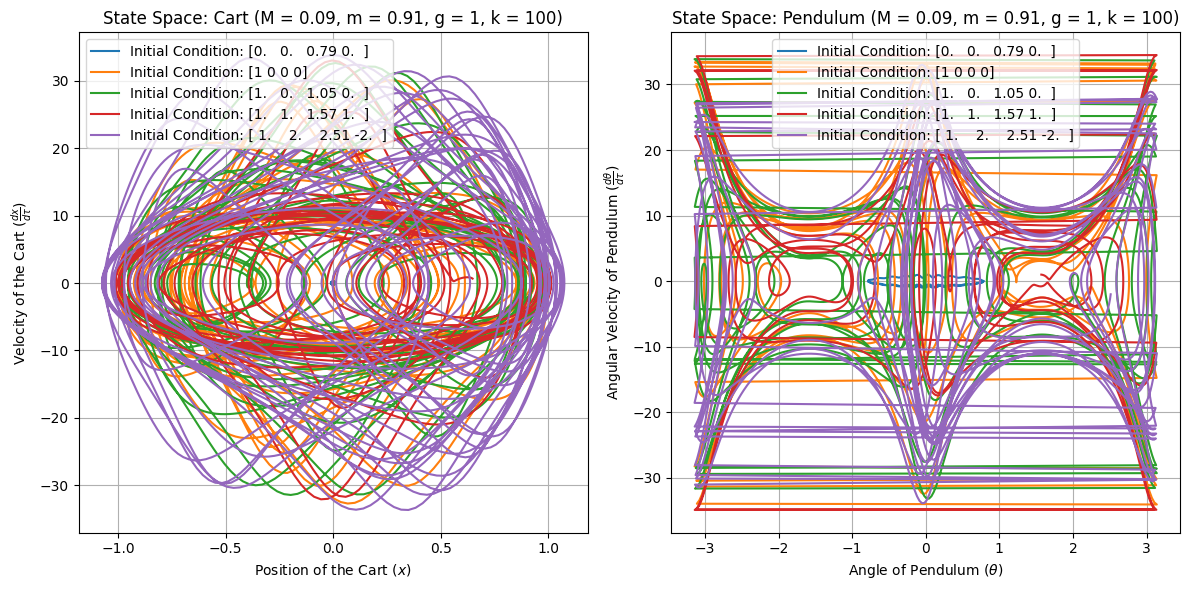

In [7]:
initial_conditions = [
    [0, 0, np.pi / 4, 0],
    [1, 0, 0, 0],
    [1, 0, np.pi / 3, 0],
    [1, 1, np.pi / 2, 1],
    [1, 2, np.pi * 0.8, -2],
]

solutions = []
for i, Y0 in enumerate(initial_conditions):
    x, dx_dτ, θ, dθ_dτ = solve_and_extract(model, Y0, τ, (M, m, g, k, l, L, T))
    solutions.append((x, dx_dτ, θ, dθ_dτ))

# Plot the results
plt.figure(figsize=(12, 6))

for cond, solution in zip(initial_conditions, solutions):
    x, dx_dτ, θ, dθ_dτ = solution
    
    # Phase space of x vs. dx/dτ
    plt.subplot(1, 2, 1)
    plt.plot(x, dx_dτ, label=f"Initial Condition: {np.round(cond, 2)}")
    plt.xlabel(r"Position of the Cart ($x$)")
    plt.ylabel(r"Velocity of the Cart ($\frac{dx}{d\tau}$)")

    # Phase space of θ vs. dθ/dτ
    plt.subplot(1, 2, 2)
    plt.plot(θ, dθ_dτ, label=f"Initial Condition: {np.round(cond, 2)}")
    plt.xlabel(r"Angle of Pendulum ($\theta$)")
    plt.ylabel(r"Angular Velocity of Pendulum ($\frac{d\theta}{d\tau}$)")
    

plt.subplot(1, 2, 1) 
plt.title(f"State Space: Cart (M = {M}, m = {m}, g = {g}, k = {k})")
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
plt.title(f"State Space: Pendulum (M = {M}, m = {m}, g = {g}, k = {k})")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(f"./figures/r-{(M / m):.0f}-k-{k}-g-{g}.pdf", format="pdf")
plt.show()

## Natural angular velocity of cart ($\sqrt{\frac{k}{M + m}}$) << pendulum ($\sqrt{\frac{g}{l}}$) $\rarr$ stable pendulum + pattern cart

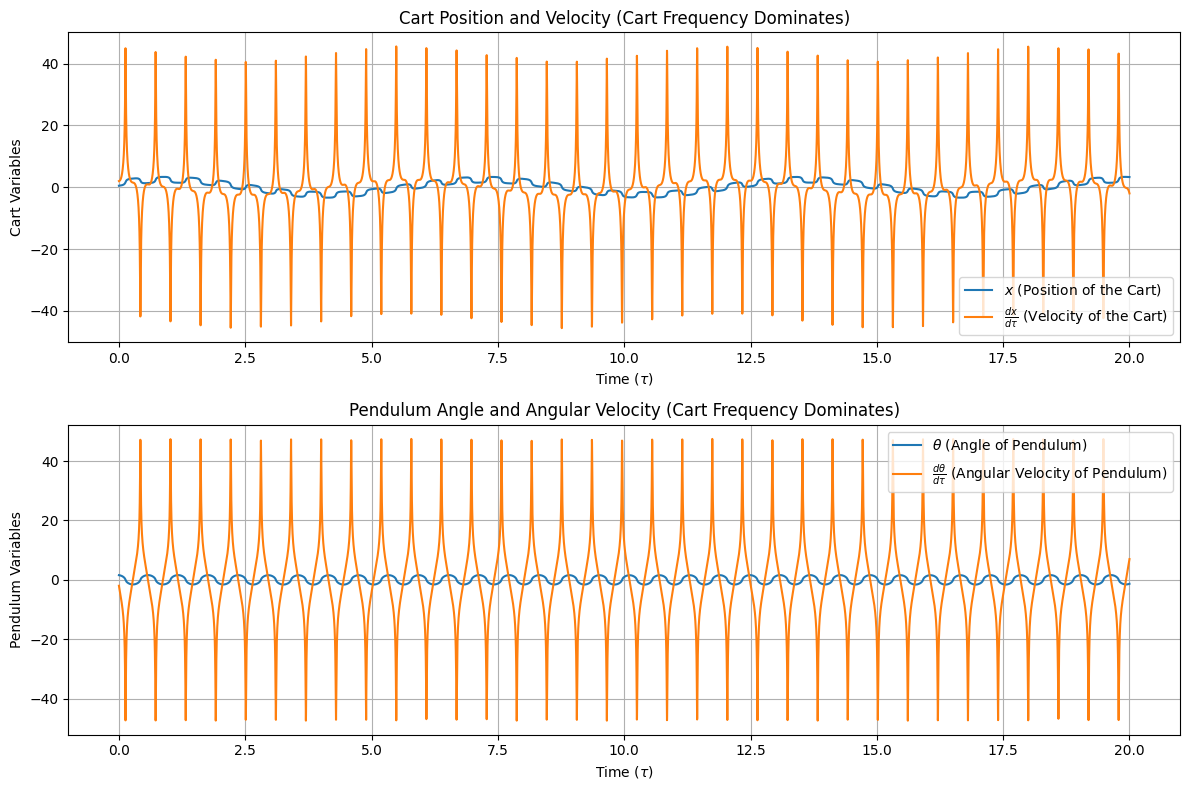

In [8]:
# Modify constants to make the cart frequency dominate
M = 0.09 # Mass of the cart
m = 0.91  # Mass of the pendulum
g = 100  # Gravity
k = 1  # Spring constant
l = 1  # Length of the pendulum
L = 1  # Unit length
T = 1  # Unit time

# Initial conditions
x0 = 0.5
dx_dτ0 = 2
θ0 = np.pi * 0.5
dθ_dτ0 = -2
Y0 = [x0, dx_dτ0, θ0, dθ_dτ0]

# Solve the Differential Equations
τ_max = 20
num_point = 10_000
τ = np.linspace(0, τ_max, num_point)
x, dx_dτ, θ, dθ_dτ = solve_and_extract(model, Y0, τ, (M, m, g, k, l, L, T))

# Plot the results
plt.figure(figsize=(12, 8))

# Plot x and dx_dτ over time
plt.subplot(2, 1, 1)
plt.plot(τ, x, label=r"$x$ (Position of the Cart)")
plt.plot(τ, dx_dτ, label=r"$\frac{dx}{d\tau}$ (Velocity of the Cart)")
plt.xlabel(r"Time ($\tau$)")
plt.ylabel("Cart Variables")
plt.legend()
plt.title("Cart Position and Velocity (Cart Frequency Dominates)")
plt.grid()

# Plot θ and dθ_dτ over time
plt.subplot(2, 1, 2)
plt.plot(τ, θ, label=r"$\theta$ (Angle of Pendulum)")
plt.plot(τ, dθ_dτ, label=r"$\frac{d\theta}{d\tau}$ (Angular Velocity of Pendulum)")
plt.xlabel(r"Time ($\tau$)")
plt.ylabel("Pendulum Variables")
plt.legend()
plt.title("Pendulum Angle and Angular Velocity (Cart Frequency Dominates)")
plt.grid()

plt.tight_layout()
plt.show()

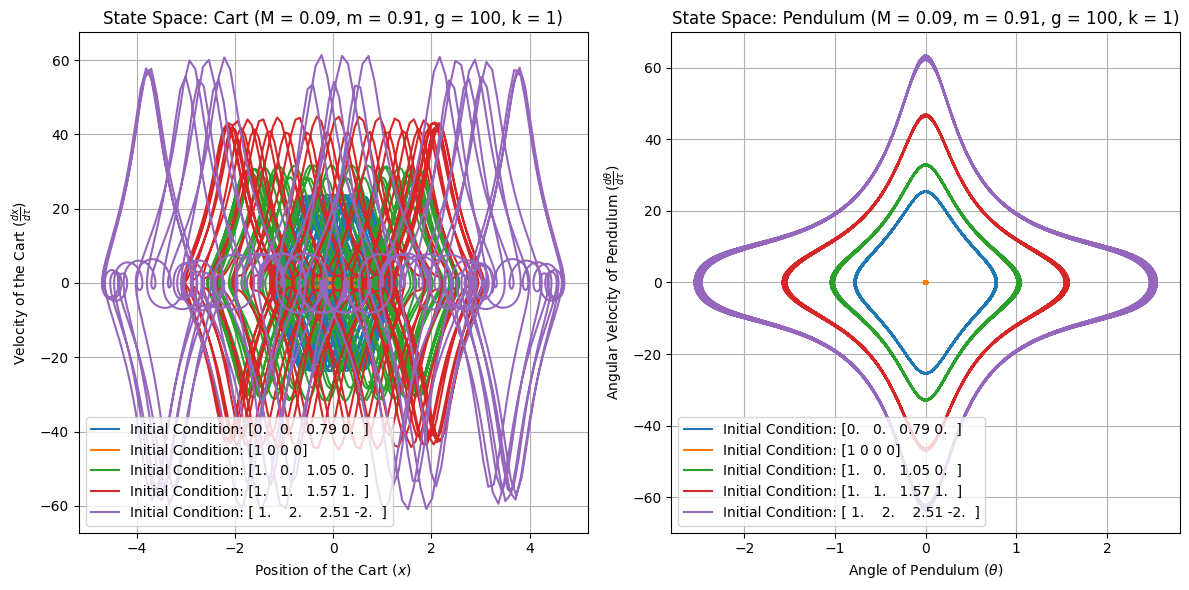

In [9]:
initial_conditions = [
    [0, 0, np.pi / 4, 0],
    [1, 0, 0, 0],
    [1, 0, np.pi / 3, 0],
    [1, 1, np.pi / 2, 1],
    [1, 2, np.pi * 0.8, -2],
]

solutions = []
for i, Y0 in enumerate(initial_conditions):
    x, dx_dτ, θ, dθ_dτ = solve_and_extract(model, Y0, τ, (M, m, g, k, l, L, T))
    solutions.append((x, dx_dτ, θ, dθ_dτ))

# Plot the results
plt.figure(figsize=(12, 6))

for cond, solution in zip(initial_conditions, solutions):
    x, dx_dτ, θ, dθ_dτ = solution
    
    # Phase space of x vs. dx/dτ
    plt.subplot(1, 2, 1)
    plt.plot(x, dx_dτ, label=f"Initial Condition: {np.round(cond, 2)}")
    plt.xlabel(r"Position of the Cart ($x$)")
    plt.ylabel(r"Velocity of the Cart ($\frac{dx}{d\tau}$)")

    # Phase space of θ vs. dθ/dτ
    plt.subplot(1, 2, 2)
    plt.plot(θ, dθ_dτ, label=f"Initial Condition: {np.round(cond, 2)}")
    plt.xlabel(r"Angle of Pendulum ($\theta$)")
    plt.ylabel(r"Angular Velocity of Pendulum ($\frac{d\theta}{d\tau}$)")
    

plt.subplot(1, 2, 1) 
plt.title(f"State Space: Cart (M = {M}, m = {m}, g = {g}, k = {k})")
plt.grid()
plt.legend()
plt.subplot(1, 2, 2)
plt.title(f"State Space: Pendulum (M = {M}, m = {m}, g = {g}, k = {k})")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(f"./figures/r-{(M / m):.0f}-k-{k}-g-{g}.pdf", format="pdf")
plt.show()